# (Spam Ham) Naive Bayes Classifier

## Importing the Packages 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:

docs=pd.read_table('spamhamdataset',header=None,names=['Class','SMS'])
docs

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
docs.head()

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
docs.SMS.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: SMS, dtype: object

In [6]:
docs.shape

(5572, 2)

In [7]:
docs.describe()

,Class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [65]:
docs.isna().mean().sum()

np.float64(0.0)

### Mapping the label as spam and ham 

In [22]:
docs['Label']=docs.Class.map({'ham':0,'spam':1})
docs.head()

,Class,SMS,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [23]:
x=docs.SMS
y=docs.Label

In [24]:
x.shape

(5572,)

In [25]:
y.shape

(5572,)

In [26]:
from sklearn.model_selection import train_test_split as  tts

In [27]:
X_train,x_test,Y_train,y_test=tts(x,y,test_size=0.30)

In [28]:
X_train.shape

(3900,)

In [29]:
x_test.shape

(1672,)

In [30]:
Y_train.shape

(3900,)

In [31]:
y_test.shape

(1672,)

In [32]:
X_train.head()

1088                             You can never do NOTHING
5502                 Apo all other are mokka players only
2170    Shop till u Drop, IS IT YOU, either 10K, 5K, £...
579     our mobile number has won £5000, to claim call...
5432                               Thanx a lot 4 ur help!
Name: SMS, dtype: object

In [33]:
Y_train.head()

1088    0
5502    0
2170    1
579     1
5432    0
Name: Label, dtype: int64

## Vectorizing the text : Data Transformation 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer as cvec

In [26]:
vector=cvec()

In [ ]:
vector.fit([x[0]])
print(vector.vocabulary_)
newval=vector.transform([x[0]])
print(newval)
vector.get_feature_names_out()
print(newval.toarray())

### Removing stop words. Stopwords are the words which are used commonly in sentences or words we speak or text we need to remove those to make it effcient 

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopword=set(stopwords.words('english'))
print(stopwords)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
vector=CountVectorizer(stop_words=('english'))

In [37]:
vector.fit([x[0]])
print(vector.vocabulary_)
vector.transform([x[0]])
vector.get_feature_names_out()


{'jurong': 8, 'point': 10, 'crazy': 5, 'available': 1, 'bugis': 3, 'great': 7, 'world': 12, 'la': 9, 'buffet': 2, 'cine': 4, 'got': 6, 'amore': 0, 'wat': 11}


array(['amore', 'available', 'buffet', 'bugis', 'cine', 'crazy', 'got',
       'great', 'jurong', 'la', 'point', 'wat', 'world'], dtype=object)

### Training the entire xtrain 

In [38]:
from sklearn.feature_extraction.text import CountVectorizer as countvc
vectorsn=countvc(stop_words=('english'))

In [39]:
vectorsn.fit(X_train)

CountVectorizer(stop_words='english')

In [40]:
vectorsn.vocabulary_

{'apo': 913,
 'mokka': 4127,
 'players': 4707,
 'shop': 5505,
 'till': 6197,
 'drop': 2241,
 '10k': 241,
 '5k': 507,
 '500': 485,
 'cash': 1518,
 '100': 231,
 'travel': 6313,
 'voucher': 6588,
 '09064011000': 186,
 'ntt': 4365,
 'po': 4727,
 'box': 1319,
 'cr01327bt': 1860,
 'fixedline': 2607,
 'cost': 1831,
 '150ppm': 281,
 'mobile': 4110,
 'vary': 6522,
 'number': 4370,
 'won': 6794,
 '5000': 486,
 'claim': 1648,
 'calls': 1470,
 'ring': 5211,
 'claims': 1649,
 'hot': 3175,
 'line': 3721,
 '09050005321': 153,
 'thanx': 6128,
 'lot': 3803,
 'ur': 6471,
 'help': 3086,
 'gd': 2804,
 'luck': 3841,
 'exams': 2437,
 'jus': 3498,
 'finish': 2595,
 'blowing': 1269,
 'hair': 2990,
 'dinner': 2117,
 'yes': 6898,
 'really': 5050,
 'great': 2930,
 'bhaji': 1211,
 'told': 6242,
 'kallis': 3513,
 'best': 1200,
 'cricketer': 1882,
 'sachin': 5286,
 'world': 6817,
 'tough': 6287,
 'sort': 5698,
 'code': 1693,
 'acc': 713,
 'bank': 1109,
 'natwest': 4253,
 'reply': 5149,
 'confirm': 1772,
 've': 6528

In [41]:
vectorsn.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zoom', 'èn', 'ú1'], dtype=object)

In [42]:
X_train_trans=vectorsn.fit_transform(X_train)
X_train_trans.shape

(3900, 6939)

In [43]:
x_test_trans=vectorsn.transform(x_test)
x_test_trans.shape

(1672, 6939)

## Importing naive bayes and it uses BernouliiNB 

In [44]:
from sklearn.naive_bayes import BernoulliNB as bnb

In [45]:
naive=bnb()

In [46]:
naive.fit(X_train_trans,Y_train)

BernoulliNB()

In [47]:
naive_pred=naive.predict(x_test_trans)
print(naive_pred)

[0 0 0 ... 1 0 0]


### Predict Posterior Probablity 

In [48]:
naive_prob=naive.predict_proba(x_test_trans)
print(naive_prob)

[[1.00000000e+00 2.58781318e-10]
 [1.00000000e+00 6.12645948e-11]
 [9.99999287e-01 7.12937479e-07]
 ...
 [2.01869599e-15 1.00000000e+00]
 [9.99999999e-01 1.23160383e-09]
 [1.00000000e+00 5.67167594e-11]]


### Predicting with Single value -- We only need to do transform data not fit transform because bernoulli wont accept thing if its column feature doesnt matches 

In [52]:
val=docs.SMS.iloc[2]
out=docs.Label.iloc[2]
print(val)
print(out)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
1


In [53]:
transf_sin_val=vectorsn.transform([val])

In [54]:
transf_sin_val.shape

(1, 6939)

In [80]:
pred_sin_val=naive.predict(transf_sin_val)

pred_prob_sin_value=naive.predict_proba(transf_sin_val)
value=np.array(pred_prob_sin_value)

prob_value = f"{value[0, 0]:.4f}"
print(f"Output from Predictor: {pred_sin_val}")

print(f"Output Probability from Predictor: {prob_value}")
print(f"Actual Output : {out}")

Output from Predictor: [1]
Output Probability from Predictor: 0.0000
Actual Output : 1


## Checking the Metrics of the model

In [56]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score as acc, precision_score as ps,classification_report as cr
from sklearn.metrics import auc,roc_auc_score,roc_curve

In [57]:
confuse=cm(y_test,naive_pred)
print(confuse)

[[1453    0]
 [  42  177]]


In [58]:
accuracy=acc(y_test,naive_pred)
accuracy

0.9748803827751196

In [81]:
precision=ps(y_test,naive_pred)
print(precision)

1.0


In [60]:
classreport=cr(y_test,naive_pred)
print(classreport)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.89       219

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672



In [57]:
qnum=auc(x_test_trans,naive_pred)
print(qnum)

InvalidParameterError: The 'x' parameter of auc must be an array-like. Got <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11415 stored elements and shape (1672, 6929)> instead.

In [61]:
auc_roc=roc_auc_score(y_test,naive_pred)
print(auc_roc)

0.904109589041096


In [62]:
curve=roc_curve(y_test,naive_pred)
print(curve)

(array([0., 0., 1.]), array([0.        , 0.80821918, 1.        ]), array([inf,  1.,  0.]))


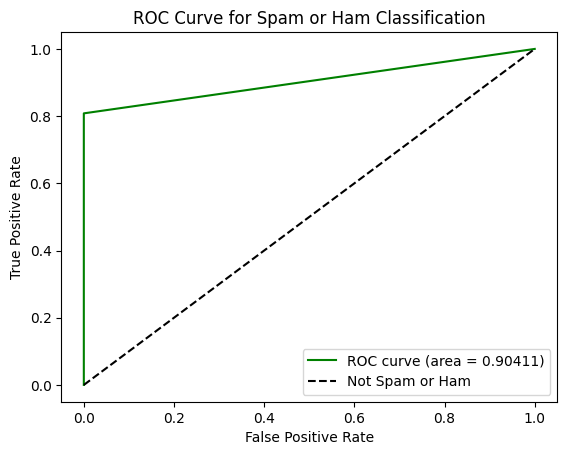

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, naive_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Not Spam or Ham')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam or Ham Classification')
plt.legend()
plt.show()

# Exporting the model using pickle

In [51]:
import pickle as pk

In [52]:
pk.dump(naive,open('Spam_pred_algorithm.sav','wb'))